# Used Car Price Prediction

## 1) Problem statement.

* This dataset comprises used cars sold on cardehko.com in India as well as important features of these cars.
* If user can predict the price of the car based on input features.
* Prediction results can be used to give new seller the price suggestion based on market condition.

## 2) Data Collection.
* The Dataset is collected from scrapping from cardheko webiste
* The data consists of 13 column and 15411 rows.

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings

warnings.filterwarnings("ignore")

%matplotlib inline

In [37]:
df = pd.read_csv(r"D:\Summer research internship\Car price\cardekho_imputated.csv", index_col=[0])

In [38]:
df.head()

,car_name,brand,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Maruti Alto,Maruti,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Hyundai Grand,Hyundai,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,Hyundai i20,Hyundai,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Maruti Alto,Maruti,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ford Ecosport,Ford,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [39]:
df.shape

(15411, 13)

In [40]:
df.selling_price.describe()

count    1.541100e+04
mean     7.749711e+05
std      8.941284e+05
min      4.000000e+04
25%      3.850000e+05
50%      5.560000e+05
75%      8.250000e+05
max      3.950000e+07
Name: selling_price, dtype: float64

In [41]:
mileage=pd.DataFrame(df['mileage'].unique())
mileage.describe()


,0
count,411.000000
mean,17.866837
std,5.020310
min,4.000000
25%,14.260000
50%,17.740000
75%,20.905000
max,33.540000


## Data Cleaning
### Handling Missing values

* Handling Missing values 
* Handling Duplicates
* Check data type
* Understand the dataset

In [42]:
## Check Null Values
##Check features with nan value
df.isnull().sum()

car_name             0
brand                0
model                0
vehicle_age          0
km_driven            0
seller_type          0
fuel_type            0
transmission_type    0
mileage              0
engine               0
max_power            0
seats                0
selling_price        0
dtype: int64

In [43]:
## Remove Unnecessary Columns
df.drop('car_name', axis=1, inplace=True)
df.drop('brand', axis=1, inplace=True)

In [44]:
df.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats,selling_price
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5,120000
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5,550000
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5,215000
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5,226000
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5,570000


In [45]:
df['model'].unique()

array(['Alto', 'Grand', 'i20', 'Ecosport', 'Wagon R', 'i10', 'Venue',
       'Swift', 'Verna', 'Duster', 'Cooper', 'Ciaz', 'C-Class', 'Innova',
       'Baleno', 'Swift Dzire', 'Vento', 'Creta', 'City', 'Bolero',
       'Fortuner', 'KWID', 'Amaze', 'Santro', 'XUV500', 'KUV100', 'Ignis',
       'RediGO', 'Scorpio', 'Marazzo', 'Aspire', 'Figo', 'Vitara',
       'Tiago', 'Polo', 'Seltos', 'Celerio', 'GO', '5', 'CR-V',
       'Endeavour', 'KUV', 'Jazz', '3', 'A4', 'Tigor', 'Ertiga', 'Safari',
       'Thar', 'Hexa', 'Rover', 'Eeco', 'A6', 'E-Class', 'Q7', 'Z4', '6',
       'XF', 'X5', 'Hector', 'Civic', 'D-Max', 'Cayenne', 'X1', 'Rapid',
       'Freestyle', 'Superb', 'Nexon', 'XUV300', 'Dzire VXI', 'S90',
       'WR-V', 'XL6', 'Triber', 'ES', 'Wrangler', 'Camry', 'Elantra',
       'Yaris', 'GL-Class', '7', 'S-Presso', 'Dzire LXI', 'Aura', 'XC',
       'Ghibli', 'Continental', 'CR', 'Kicks', 'S-Class', 'Tucson',
       'Harrier', 'X3', 'Octavia', 'Compass', 'CLS', 'redi-GO', 'Glanza',
       

In [46]:
## Getting All Different Types OF Features
num_features = [feature for feature in df.columns if df[feature].dtype != 'O']
print('Num of Numerical Features :', len(num_features))
cat_features = [feature for feature in df.columns if df[feature].dtype == 'O']
print('Num of Categorical Features :', len(cat_features))
discrete_features=[feature for feature in num_features if len(df[feature].unique())<=25]
print('Num of Discrete Features :',len(discrete_features))
continuous_features=[feature for feature in num_features if feature not in discrete_features]
print('Num of Continuous Features :',len(continuous_features))

Num of Numerical Features : 7
Num of Categorical Features : 4
Num of Discrete Features : 2
Num of Continuous Features : 5


<Figure size 640x480 with 0 Axes>

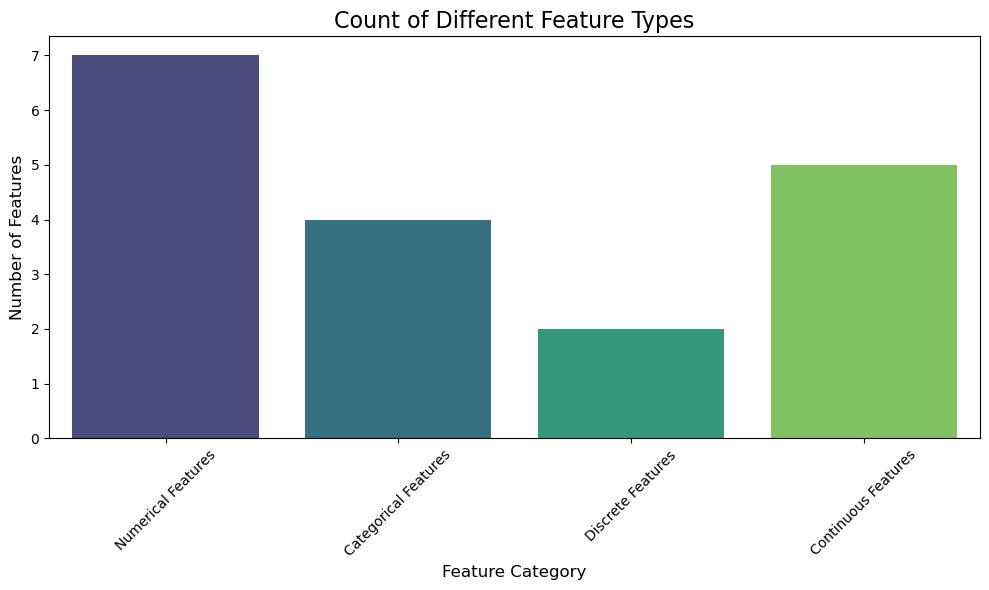

In [47]:
data = {
    'Category': ['Numerical Features', 'Categorical Features', 'Discrete Features', 'Continuous Features'],
    'Count': [7, 4, 2, 5]
}
df_plot = pd.DataFrame(data)

# Create the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Category', y='Count', data=df_plot, palette='viridis')
plt.title('Count of Different Feature Types', fontsize=16)
plt.xlabel('Feature Category', fontsize=12)
plt.ylabel('Number of Features', fontsize=12)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [48]:
sp=pd.DataFrame(df['selling_price'])
sp

,selling_price
0,120000
1,550000
2,215000
3,226000
4,570000
...,...
19537,250000
19540,925000
19541,425000
19542,1225000


In [49]:
df['selling_price']

0         120000
1         550000
2         215000
3         226000
4         570000
          ...   
19537     250000
19540     925000
19541     425000
19542    1225000
19543    1200000
Name: selling_price, Length: 15411, dtype: int64

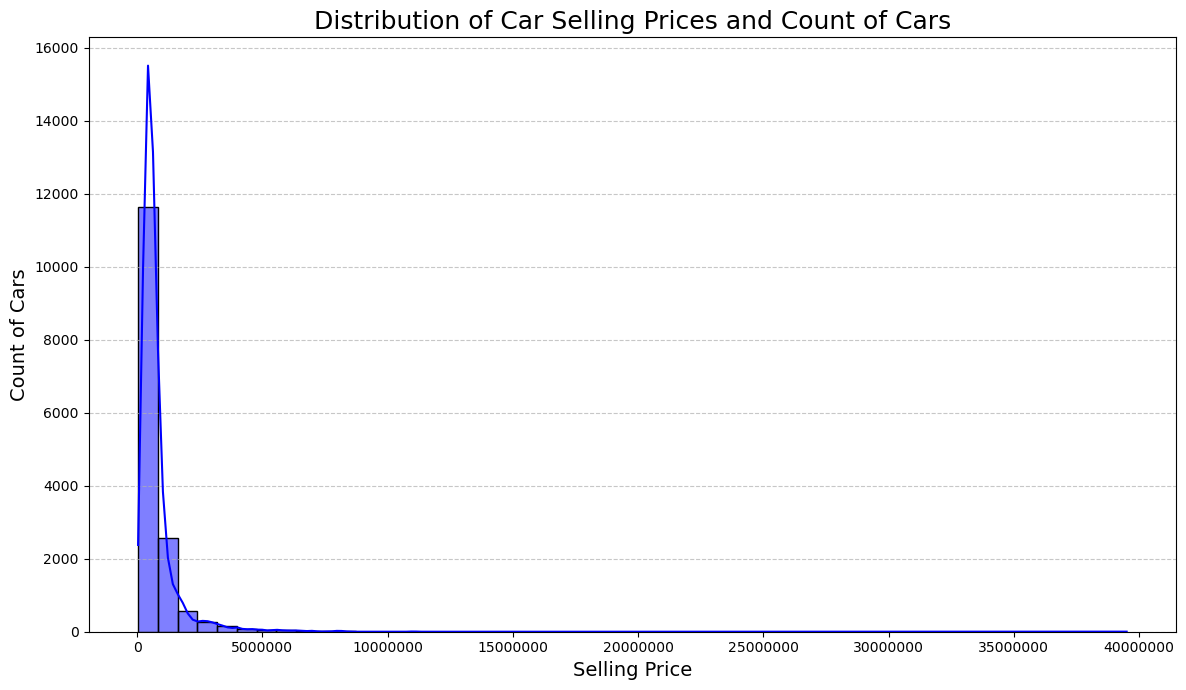

In [50]:
'''# Create a histogram for the car prices.
# 'bins' controls the number of intervals, and 'kde=True' adds a smooth distribution curve.
plt.figure(figsize=(10, 6))
sns.histplot(x=df['selling_price'], bins=50, kde=True)
plt.title('Distribution of Car Selling Prices', fontsize=16)
plt.xlabel('Selling Price')
plt.ylabel('Count of Cars')
plt.tight_layout()
plt.savefig('carprice_histogram.png')
plt.show()'''

# Create a histogram for the car prices
# 'x=car_prices' specifies the selling price on the x-axis.
# 'bins=50' divides the price range into 50 intervals. You can adjust this number.
# 'kde=True' overlays a Kernel Density Estimate curve, which smooths the distribution.
plt.figure(figsize=(12, 7)) # Set the figure size for better readability
sns.histplot(x=df['selling_price'], bins=50, kde=True, color='blue', edgecolor='black')

# Add titles and labels for clarity
plt.title('Distribution of Car Selling Prices and Count of Cars', fontsize=18)
plt.xlabel('Selling Price', fontsize=14)
plt.ylabel('Count of Cars', fontsize=14)

# Improve readability of x-axis ticks (optional, especially for large numbers)
plt.ticklabel_format(style='plain', axis='x') # Prevent scientific notation on x-axis

plt.grid(axis='y', linestyle='--', alpha=0.7) # Add a grid for better readability
plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()


In [51]:
## Indpendent and dependent features
from sklearn.model_selection import train_test_split
X = df.drop(['selling_price'], axis=1)
y = df['selling_price']

In [52]:
sns.scatterplot(y)

<Axes: ylabel='selling_price'>

In [53]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,Alto,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,Grand,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,i20,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,Alto,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,Ecosport,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


## Feature Encoding and Scaling
**One Hot Encoding for Columns which had lesser unique values and not ordinal**
* One hot encoding is a process by which categorical variables are converted into a form that could be provided to ML algorithms to do a better job in prediction.

In [54]:
len(df['model'].unique())

120

In [55]:
df['model'].value_counts()

model
i20             906
Swift Dzire     890
Swift           781
Alto            778
City            757
               ... 
Altroz            1
C                 1
Ghost             1
Quattroporte      1
Gurkha            1
Name: count, Length: 120, dtype: int64

In [56]:
'''from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
X['model']=le.fit_transform(X['model'])'''

"from sklearn.preprocessing import LabelEncoder\nle=LabelEncoder()\nX['model']=le.fit_transform(X['model'])"

In [57]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X['model'] = le.fit_transform(X['model'])
import json
# Save mapping
model_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
# Convert keys and values to int or str for JSON serialization
model_mapping_json = {str(k): int(v) for k, v in model_mapping.items()}
with open("model_label_map.json", "w") as f:
    json.dump(model_mapping_json, f)

In [58]:
X.head()

,model,vehicle_age,km_driven,seller_type,fuel_type,transmission_type,mileage,engine,max_power,seats
0,7,9,120000,Individual,Petrol,Manual,19.70,796,46.30,5
1,54,5,20000,Individual,Petrol,Manual,18.90,1197,82.00,5
2,118,11,60000,Individual,Petrol,Manual,17.00,1197,80.00,5
3,7,9,37000,Individual,Petrol,Manual,20.92,998,67.10,5
4,38,6,30000,Dealer,Diesel,Manual,22.77,1498,98.59,5


In [59]:
len(df['seller_type'].unique()),len(df['fuel_type'].unique()),len(df['transmission_type'].unique())

(3, 5, 2)

In [60]:
# Create Column Transformer with 3 types of transformers
num_features = X.select_dtypes(exclude="object").columns
onehot_columns = ['seller_type','fuel_type','transmission_type']

from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()
oh_transformer = OneHotEncoder(drop='first')

preprocessor = ColumnTransformer(
    [
        ("OneHotEncoder", oh_transformer, onehot_columns),
        ("StandardScaler", numeric_transformer, num_features)
        
    ],remainder='passthrough'
    
)

In [61]:
X=preprocessor.fit_transform(X)

In [62]:
pd.DataFrame(X)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,1.247335,-0.000276,-1.324259,-1.263352,-0.403022
1,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.225693,-0.343933,-0.690016,-0.192071,-0.554718,-0.432571,-0.403022
2,1.0,0.0,0.0,0.0,0.0,1.0,1.0,1.536377,1.647309,0.084924,-0.647583,-0.554718,-0.479113,-0.403022
3,1.0,0.0,0.0,0.0,0.0,1.0,1.0,-1.519714,0.983562,-0.360667,0.292211,-0.936610,-0.779312,-0.403022
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,-0.666211,-0.012060,-0.496281,0.735736,0.022918,-0.046502,-0.403022
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15406,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.508844,0.983562,-0.869744,0.026096,-0.767733,-0.757204,-0.403022
15407,0.0,0.0,0.0,0.0,0.0,1.0,1.0,-0.556082,-1.339555,-0.728763,-0.527711,-0.216964,-0.220803,2.073444
15408,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.407551,-0.012060,0.220539,0.344954,0.022918,0.068225,-0.403022
15409,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.426247,-0.343933,72.541850,-0.887326,1.329794,0.917158,2.073444


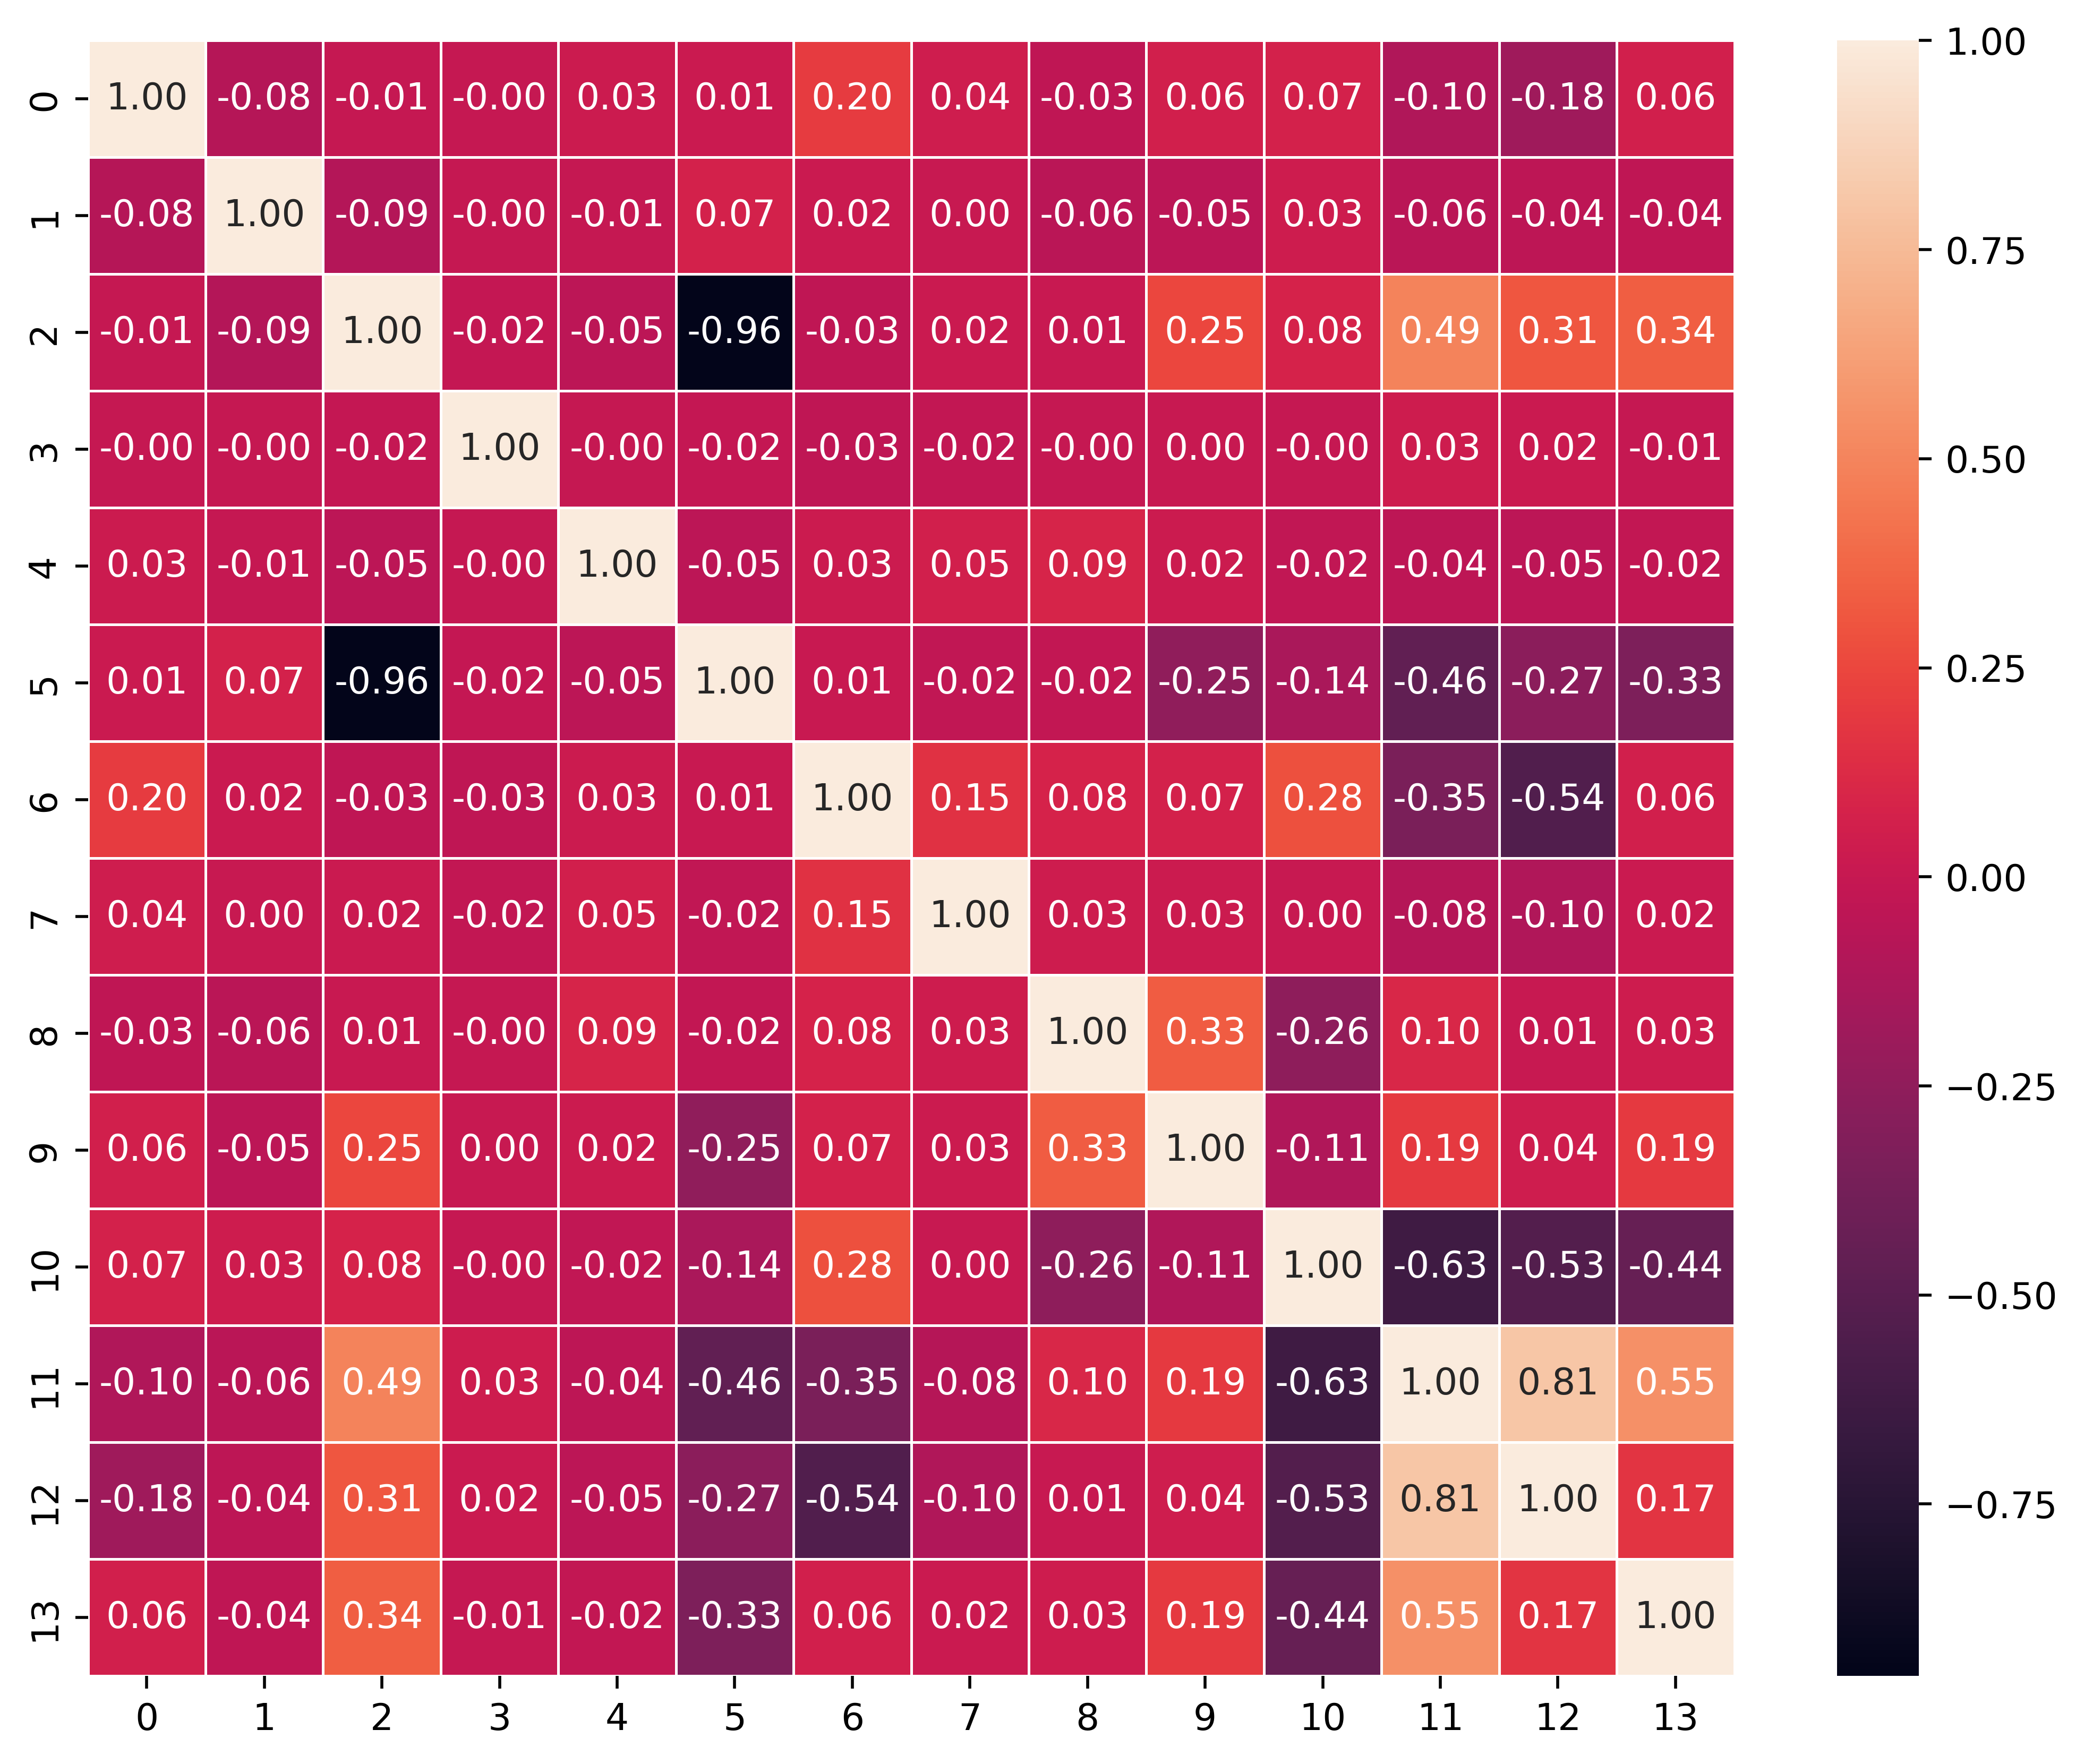

In [34]:
cor_data=pd.DataFrame(X)
cor=cor_data.corr(method='pearson')
cor

plt.figure(figsize=(10,8), dpi =500)
sns.heatmap(cor,annot=True,fmt=".2f", linewidth=.5,)
plt.show()
#plt.savefig('heatmap_corr.png')

<Figure size 640x480 with 0 Axes>

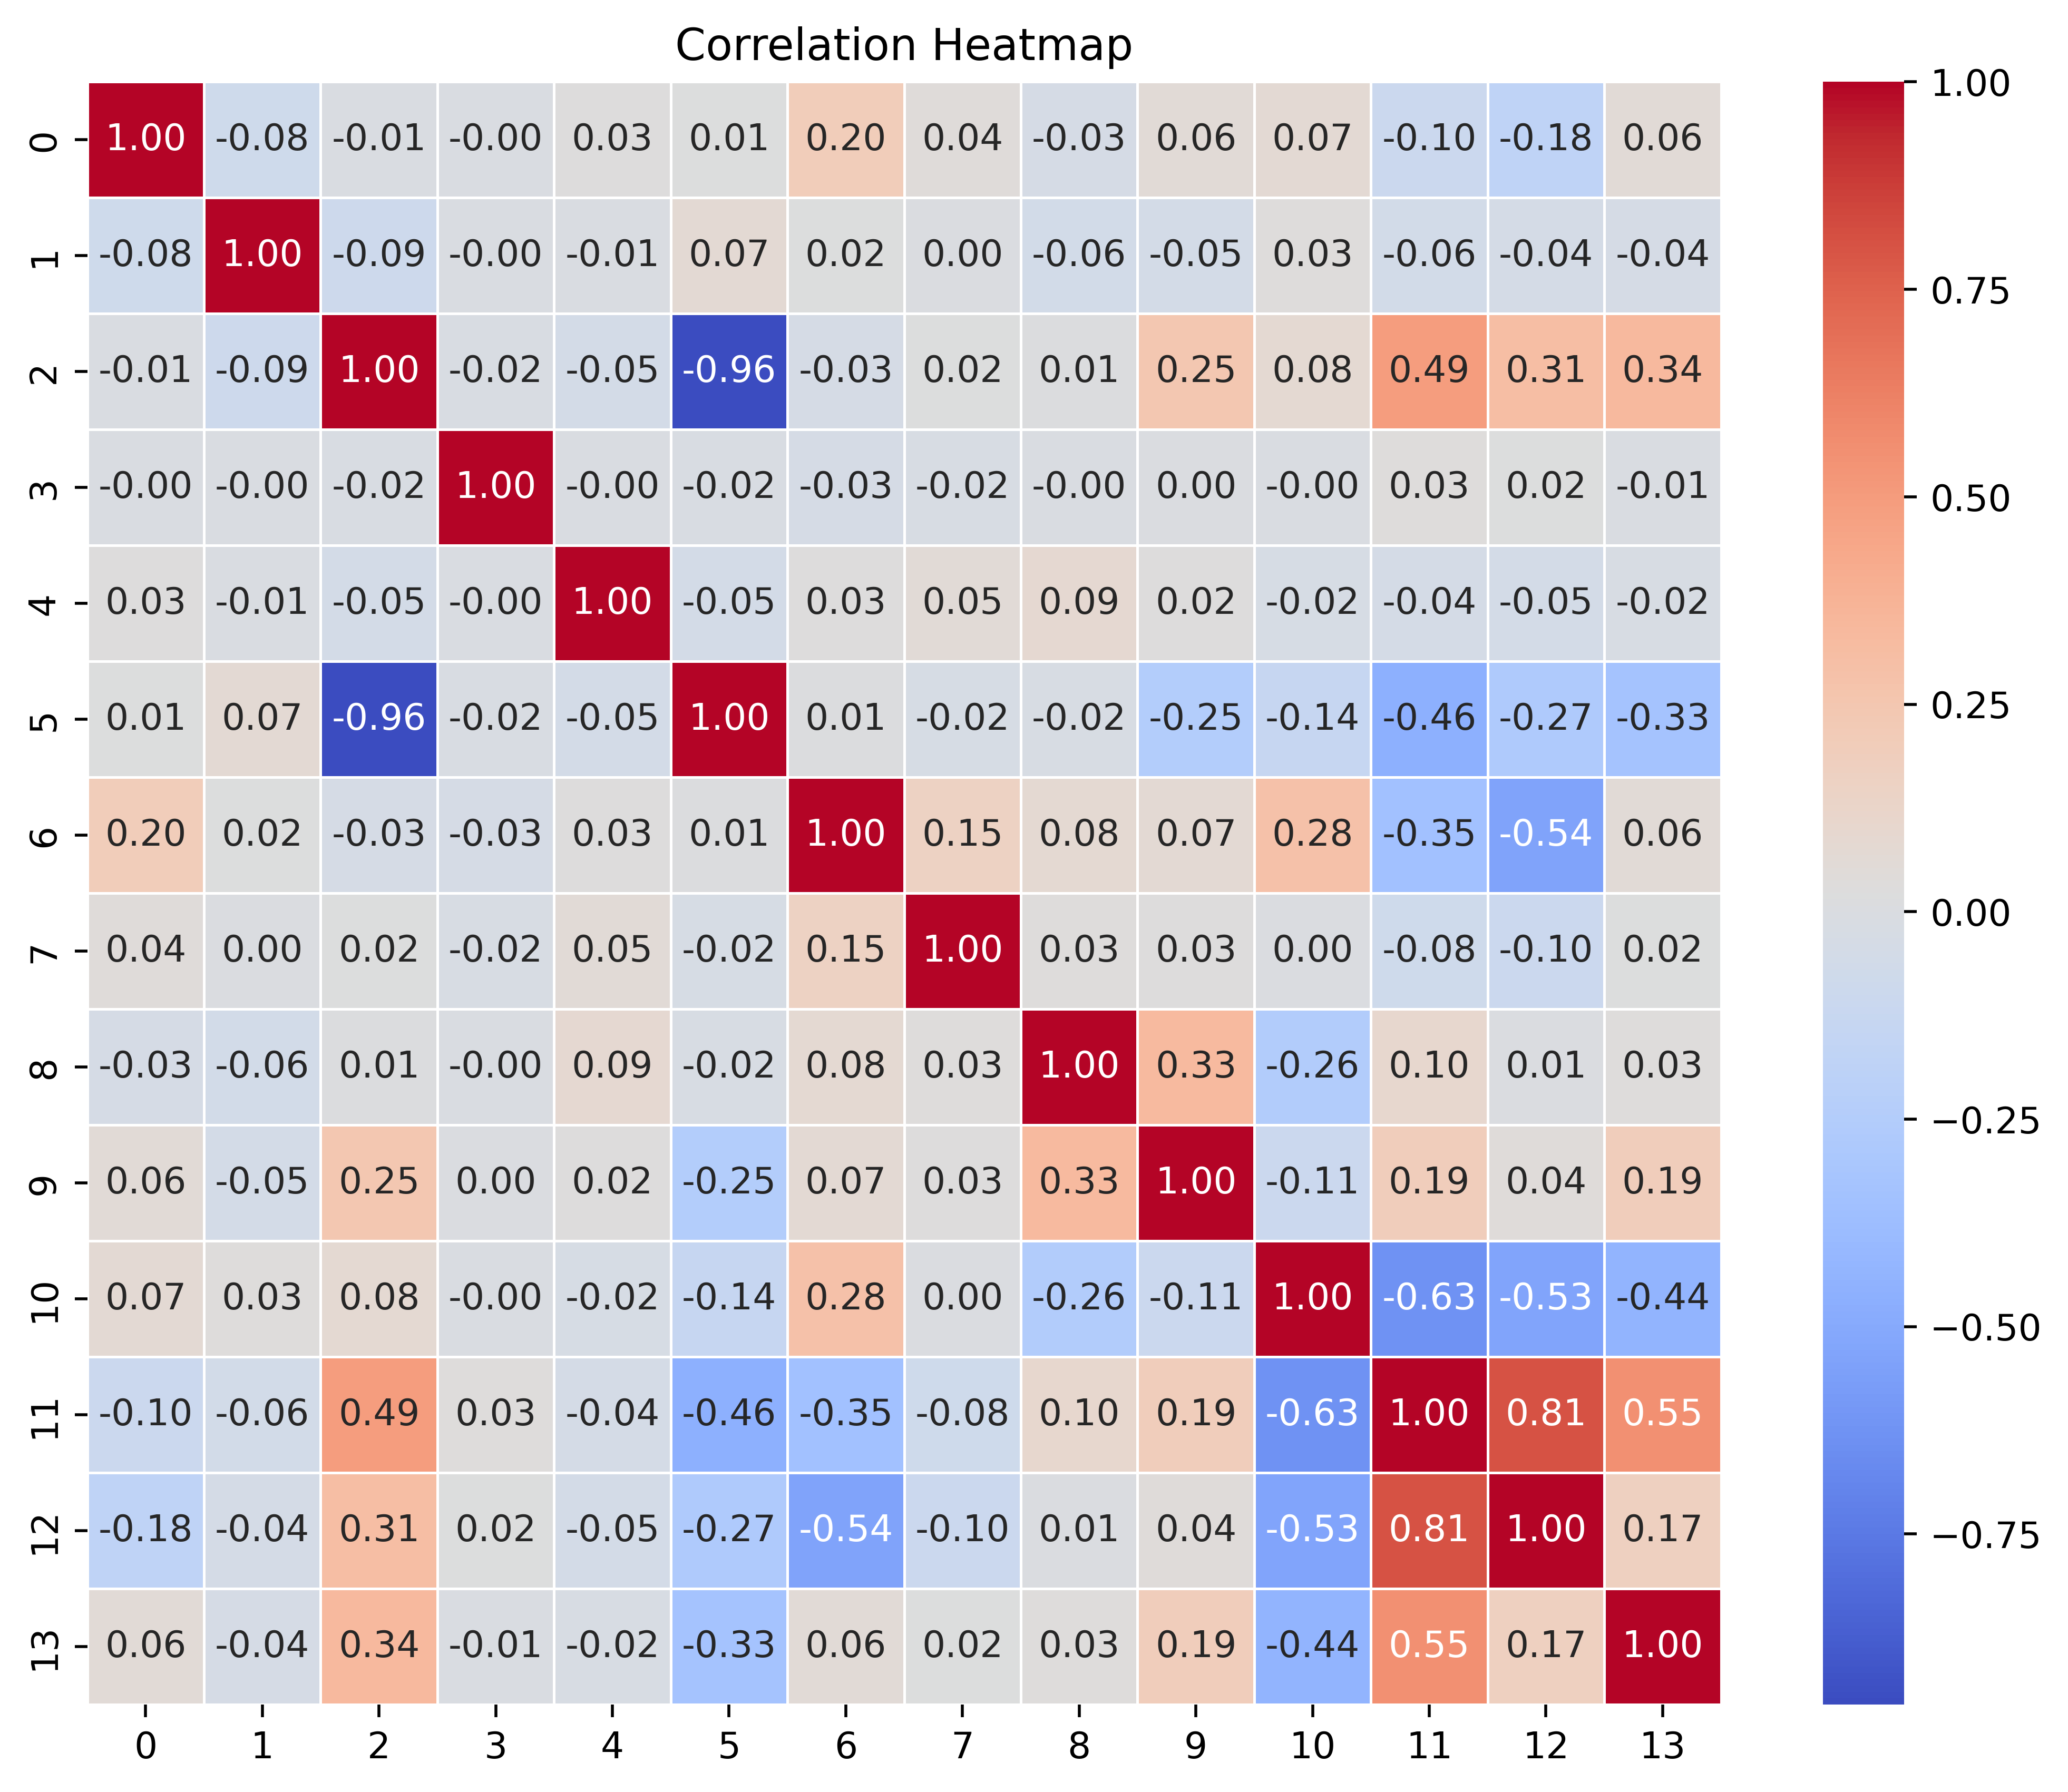

In [67]:
# Set up the plot size and resolution
plt.figure(figsize=(10, 8), dpi=500)

# Create the heatmap with the custom colormap
sns.heatmap(cor, annot=True, fmt=".2f", linewidth=.5, cmap='coolwarm')

# Add a title to the plot
plt.title('Correlation Heatmap')

plt.savefig('heatmap_corr.png')

# Display the plot
plt.show()




In [79]:
# separate dataset into train and test
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)
X_train.shape, X_test.shape

((12328, 14), (3083, 14))

In [80]:
X_train

array([[ 0.        ,  0.        ,  1.        , ...,  1.75390551,
         2.66249771, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.55087963,
        -0.38602844, -0.40302241],
       [ 0.        ,  0.        ,  1.        , ...,  0.89033072,
         3.27453006, -0.40302241],
       ...,
       [ 1.        ,  0.        ,  0.        , ..., -0.9366097 ,
        -0.78070786, -0.40302241],
       [ 0.        ,  0.        ,  0.        , ..., -0.55471774,
        -0.43582879, -0.40302241],
       [ 1.        ,  0.        ,  0.        , ..., -0.04616815,
         0.06194201, -0.40302241]])

## Model Training And Model Selection

In [75]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from sklearn.tree import DecisionTreeRegressor

In [76]:
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [77]:
##Create a Function to Evaluate Model
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [28]:
## Beginning Model Training
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "Adaboost Regressor":AdaBoostRegressor(),
    "Graident BoostRegressor":GradientBoostingRegressor(),
    "Xgboost Regressor":XGBRegressor()
   
}

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 553855.6665
- Mean Absolute Error: 268101.6071
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502543.5930
- Mean Absolute Error: 279618.5794
- R2 Score: 0.6645


Lasso
Model performance for Training set
- Root Mean Squared Error: 553855.6710
- Mean Absolute Error: 268099.2226
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502542.6696
- Mean Absolute Error: 279614.7461
- R2 Score: 0.6645


Ridge
Model performance for Training set
- Root Mean Squared Error: 553856.3160
- Mean Absolute Error: 268059.8015
- R2 Score: 0.6218
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 502533.8230
- Mean Absolute Error: 279557.2169
- R2 Score: 0.6645


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 325873.0088
- Mean 

In [45]:

# The data is structured into a list of dictionaries for each model's performance on the train and test sets.
data = [
    {'Model': 'Linear Regression', 'Dataset': 'Training', 'RMSE': 553855.6665, 'MAE': 268101.6071, 'R2 Score': 0.6218},
    {'Model': 'Linear Regression', 'Dataset': 'Test', 'RMSE': 502543.5930, 'MAE': 279618.5794, 'R2 Score': 0.6645},
    {'Model': 'Lasso', 'Dataset': 'Training', 'RMSE': 553855.6710, 'MAE': 268099.2226, 'R2 Score': 0.6218},
    {'Model': 'Lasso', 'Dataset': 'Test', 'RMSE': 502542.6696, 'MAE': 279614.7461, 'R2 Score': 0.6645},
    {'Model': 'Ridge', 'Dataset': 'Training', 'RMSE': 553856.3160, 'MAE': 268059.8015, 'R2 Score': 0.6218},
    {'Model': 'Ridge', 'Dataset': 'Test', 'RMSE': 502533.8230, 'MAE': 279557.2169, 'R2 Score': 0.6645},
    {'Model': 'K-Neighbors Regressor', 'Dataset': 'Training', 'RMSE': 325873.0088, 'MAE': 91425.4705, 'R2 Score': 0.8691},
    {'Model': 'K-Neighbors Regressor', 'Dataset': 'Test', 'RMSE': 253024.3951, 'MAE': 112526.3461, 'R2 Score': 0.9150},
    {'Model': 'Decision Tree', 'Dataset': 'Training', 'RMSE': 20797.2352, 'MAE': 5164.8199, 'R2 Score': 0.9995},
    {'Model': 'Decision Tree', 'Dataset': 'Test', 'RMSE': 308275.3332, 'MAE': 125528.7247, 'R2 Score': 0.8738},
    {'Model': 'Random Forest Regressor', 'Dataset': 'Training', 'RMSE': 127472.5130, 'MAE': 39868.5309, 'R2 Score': 0.9800},
    {'Model': 'Random Forest Regressor', 'Dataset': 'Test', 'RMSE': 222107.1024, 'MAE': 100833.5229, 'R2 Score': 0.9345},
    {'Model': 'Adaboost Regressor', 'Dataset': 'Training', 'RMSE': 460931.7653, 'MAE': 352033.2482, 'R2 Score': 0.7380},
    {'Model': 'Adaboost Regressor', 'Dataset': 'Test', 'RMSE': 493120.5513, 'MAE': 369078.1910, 'R2 Score': 0.6770},
    {'Model': 'Graident BoostRegressor', 'Dataset': 'Training', 'RMSE': 204944.5104, 'MAE': 111709.5558, 'R2 Score': 0.9482},
    {'Model': 'Graident BoostRegressor', 'Dataset': 'Test', 'RMSE': 254321.6657, 'MAE': 126161.4960, 'R2 Score': 0.9141},
    {'Model': 'Xgboost Regressor', 'Dataset': 'Training', 'RMSE': 85441.7947, 'MAE': 61009.3203, 'R2 Score': 0.9910},
    {'Model': 'Xgboost Regressor', 'Dataset': 'Test', 'RMSE': 246853.8159, 'MAE': 99048.5078, 'R2 Score': 0.9191}
]

# Create a DataFrame from the structured data
all_scores_df = pd.DataFrame(data)

# Print the resulting DataFrame
print(all_scores_df)

                      Model   Dataset         RMSE          MAE  R2 Score
0         Linear Regression  Training  553855.6665  268101.6071    0.6218
1         Linear Regression      Test  502543.5930  279618.5794    0.6645
2                     Lasso  Training  553855.6710  268099.2226    0.6218
3                     Lasso      Test  502542.6696  279614.7461    0.6645
4                     Ridge  Training  553856.3160  268059.8015    0.6218
5                     Ridge      Test  502533.8230  279557.2169    0.6645
6     K-Neighbors Regressor  Training  325873.0088   91425.4705    0.8691
7     K-Neighbors Regressor      Test  253024.3951  112526.3461    0.9150
8             Decision Tree  Training   20797.2352    5164.8199    0.9995
9             Decision Tree      Test  308275.3332  125528.7247    0.8738
10  Random Forest Regressor  Training  127472.5130   39868.5309    0.9800
11  Random Forest Regressor      Test  222107.1024  100833.5229    0.9345
12       Adaboost Regressor  Training 

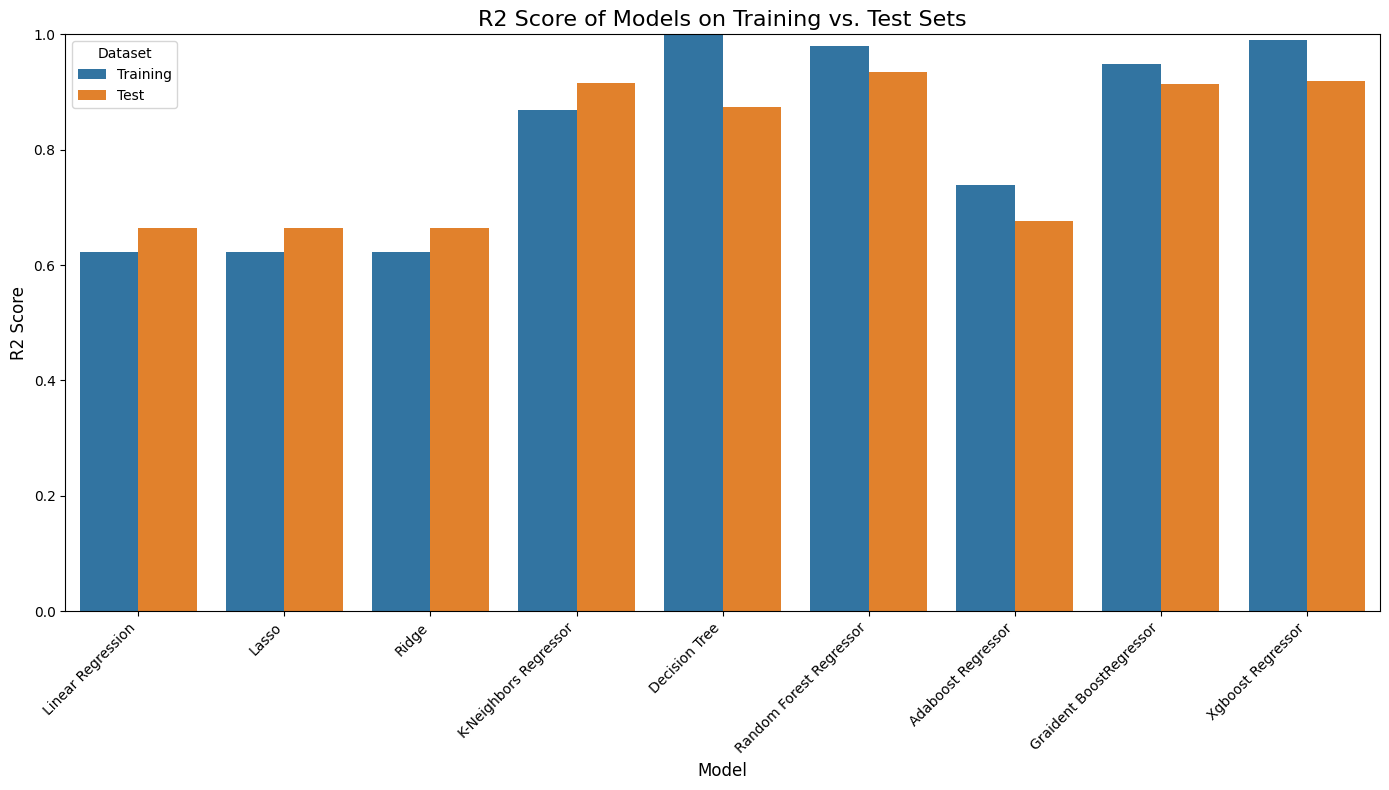

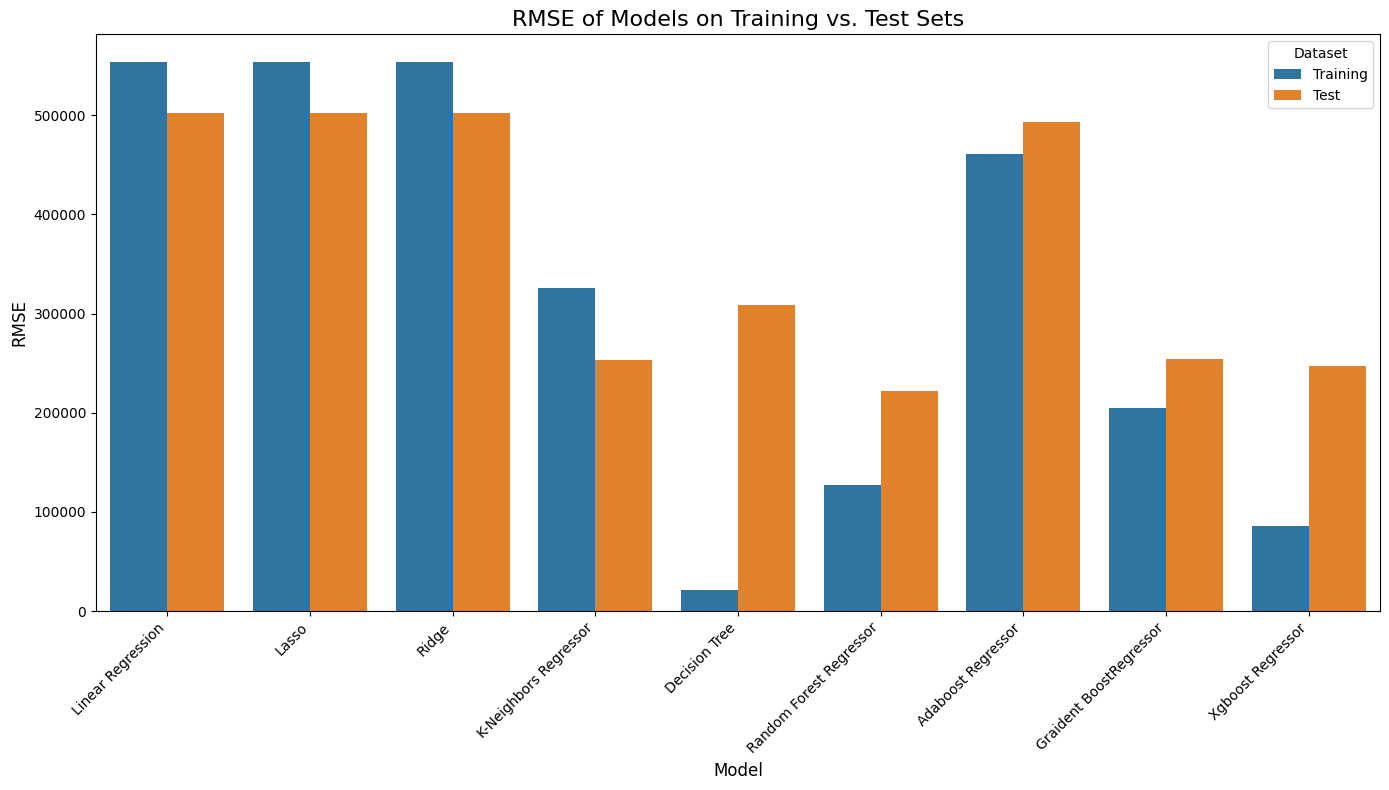

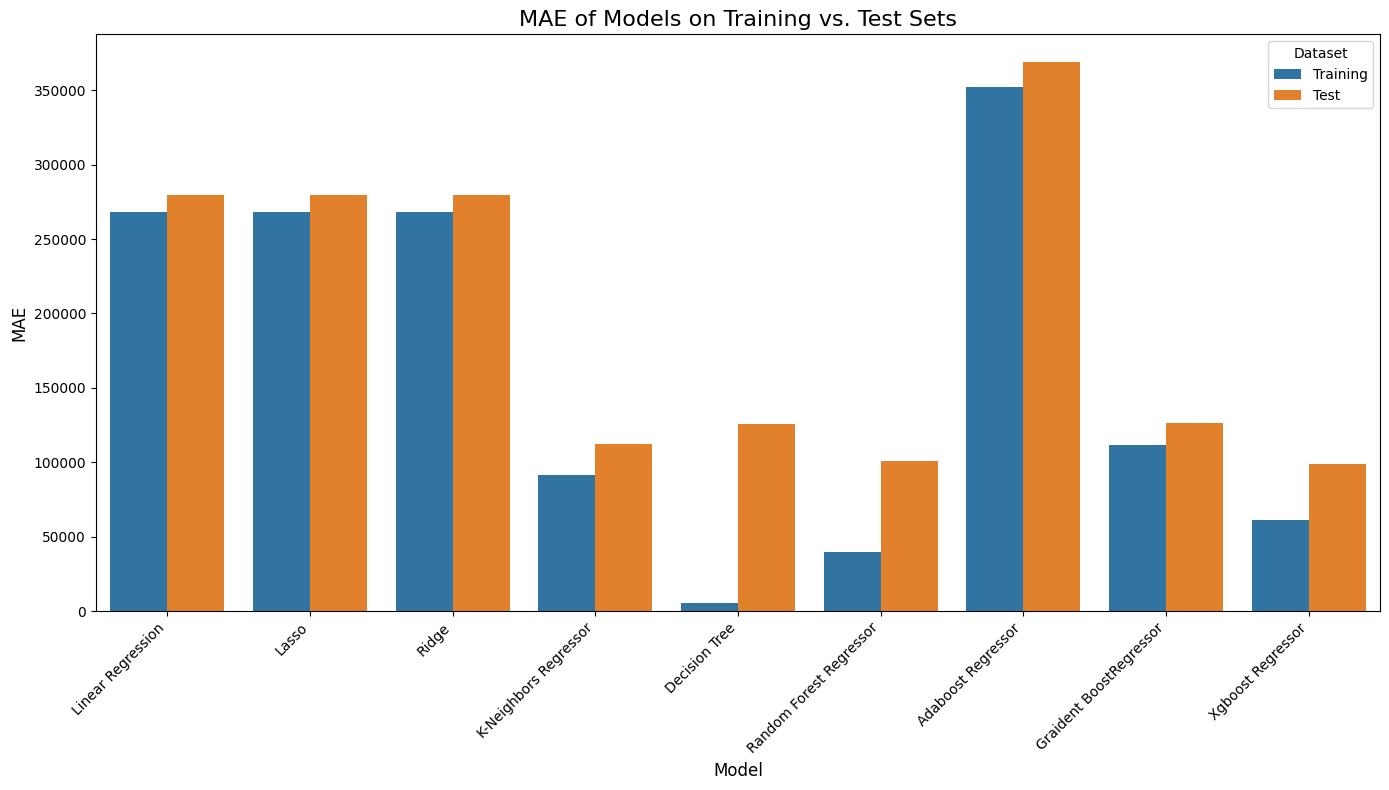

In [46]:
# Create a DataFrame from the structured data
all_scores_df = pd.DataFrame(data)

# --- Plot 1: R2 Score ---
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='R2 Score', hue='Dataset', data=all_scores_df)
plt.title('R2 Score of Models on Training vs. Test Sets', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.ylim(0, 1) # R2 score is between 0 and 1
plt.tight_layout()
plt.savefig('r2_score_grouped_bar_plot.png')
plt.show()

# --- Plot 2: RMSE ---
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='RMSE', hue='Dataset', data=all_scores_df)
plt.title('RMSE of Models on Training vs. Test Sets', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('RMSE', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('rmse_grouped_bar_plot.png')
plt.show()

# --- Plot 3: MAE ---
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='MAE', hue='Dataset', data=all_scores_df)
plt.title('MAE of Models on Training vs. Test Sets', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('MAE', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.savefig('mae_grouped_bar_plot.png')
plt.show()

xgboost_params = {
    "learning_rate": [0.1, 0.01,0.05],
    "max_depth": [5, 8, 12, 15, 20],
    "n_estimators": [100, 200, 300,400,500,600,700,800,900,1000,1100,1200,1300,1400,1500],
    "colsample_bytree": [0.3, 0.4, 0.5, 0.8, 1.0]
}

In [68]:
#Initialize few parameter for Hyperparamter tuning

rf_params = {
    "max_depth": [5, 8, 10, 15, None],
    "max_features": [5, 7, 8, "auto"],  
    "min_samples_split": [2, 8, 15, 20],
    "n_estimators": [100, 200, 500]
}




,
                   ("XGboost",XGBRegressor(),xgboost_params)

In [69]:
# Models list for Hyperparameter tuning
randomcv_models = [
                   ("RF", RandomForestRegressor(), rf_params)
                   
                   ]

In [ ]:
##Hyperparameter Tuning
from sklearn.model_selection import RandomizedSearchCV

model_param = {}
for name, model, params in randomcv_models:
    random = RandomizedSearchCV(estimator=model,
                                   param_distributions=params,
                                   n_iter=100,
                                   cv=3,
                                   verbose=2,
                                   n_jobs=-1)
    random.fit(X_train, y_train)
    model_param[name] = random.best_params_

for model_name in model_param:
    print(f"---------------- Best Params for {model_name} -------------------")
    print(model_param[model_name])

Fitting 3 folds for each of 100 candidates, totalling 300 fits


"Xgboost Regressor":XGBRegressor(n_estimators= 900,learning_rate=0.05,
                                     max_depth=5,colsample_bytree=0.5)

In [81]:
## Retraining the models with best parameters
models = {
    "Random Forest Regressor": RandomForestRegressor(n_estimators=200, min_samples_split=2, max_features=5, max_depth=None, 
                                                     n_jobs=-1),
    
}
for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)
    
    print(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    
    print('='*35)
    print('\n')

Random Forest Regressor
Model performance for Training set
- Root Mean Squared Error: 126119.7809
- Mean Absolute Error: 39239.8682
- R2 Score: 0.9804
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 211220.1037
- Mean Absolute Error: 98419.1833
- R2 Score: 0.9407




In [69]:
data=[{'Model': 'Random Forest Regressor', 'Dataset': 'Training', 'RMSE': 127472.5130, 'MAE': 39868.5309, 'R2 Score': 0.9800},
    {'Model': 'Random Forest Regressor', 'Dataset': 'Test', 'RMSE': 222107.1024, 'MAE': 100833.5229, 'R2 Score': 0.9345}]

all_scores_df=pd.DataFrame(data)

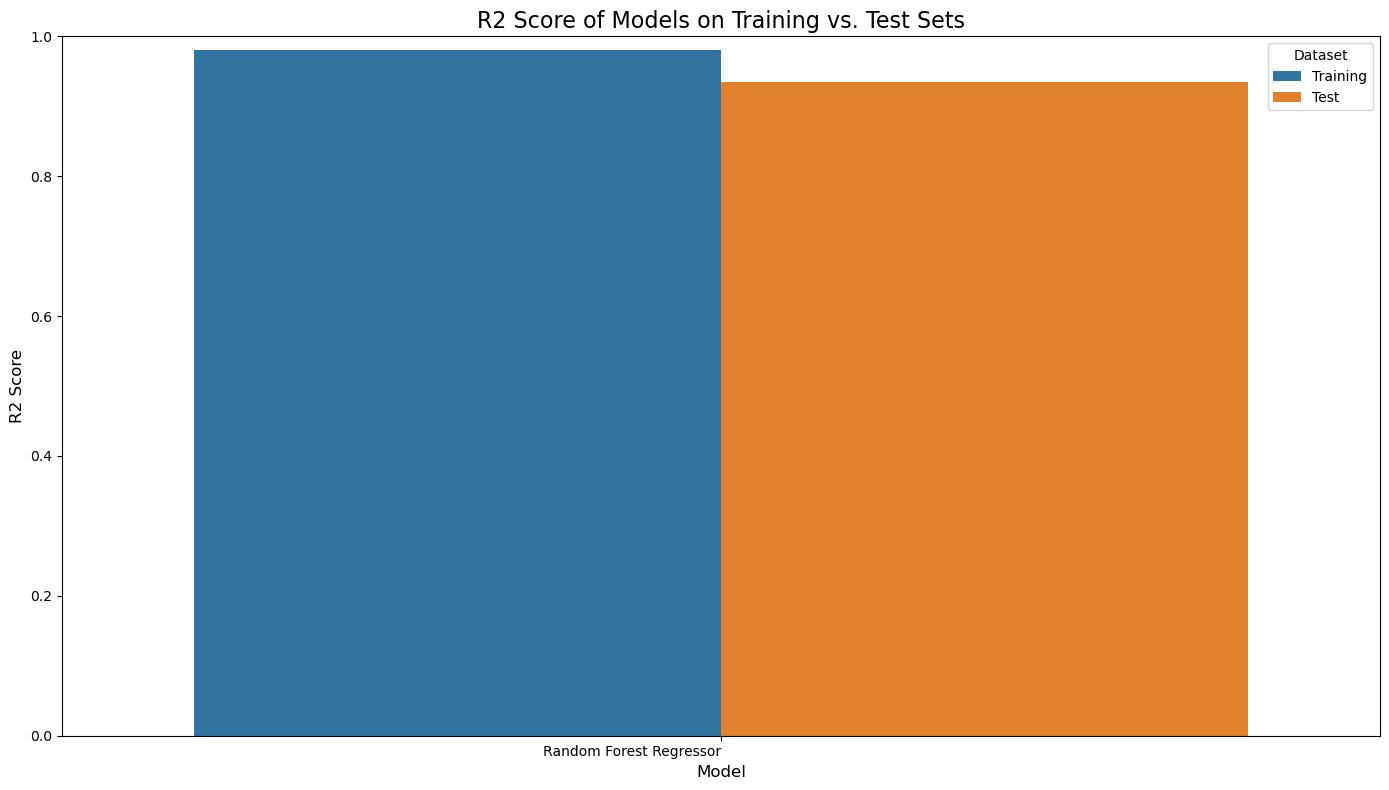

In [73]:
plt.figure(figsize=(14, 8))
sns.barplot(x='Model', y='R2 Score', hue='Dataset', data=all_scores_df)
plt.title('R2 Score of Models on Training vs. Test Sets', fontsize=16)
plt.xlabel('Model', fontsize=12)
plt.ylabel('R2 Score', fontsize=12)
plt.xticks(rotation=False, ha='right')
plt.ylim(0, 1) # R2 score is between 0 and 1
plt.tight_layout()
plt.savefig('r2_score_grouped_bar_plot.png')
plt.show()

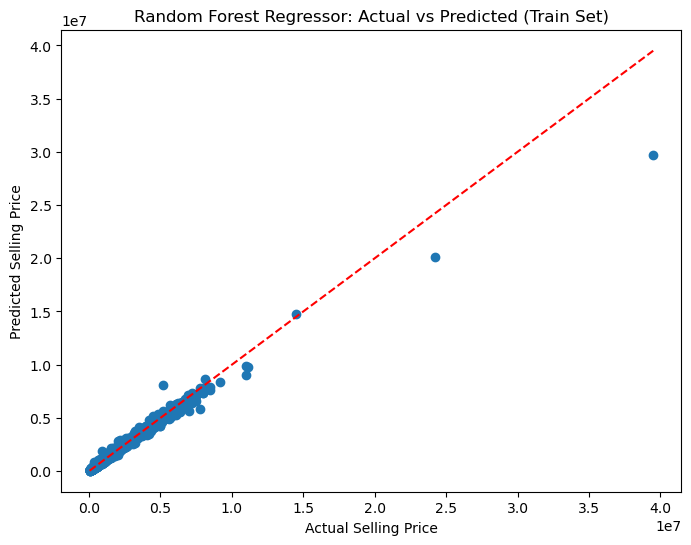

In [82]:
plt.figure(figsize=(8, 6))
plt.scatter(y_train, y_train_pred)
plt.xlabel("Actual Selling Price")
plt.ylabel("Predicted Selling Price")
plt.title("Random Forest Regressor: Actual vs Predicted (Train Set)")
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'r--')  # Diagonal line
plt.savefig("Actual vs pred.png")
plt.show()


In [ ]:
import pickle

# Saved the trained Random Forest Regressor model as an example
with open('random_forest_regressor.pkl', 'wb') as f:
    pickle.dump(models['Random Forest Regressor'], f)

# Saved the preprocessor as well
with open('preprocessor.pkl', 'wb') as f:
    pickle.dump(preprocessor, f)

KeyError: 'Random Forest Regressor'

In [ ]:
import os
import json

# Create a folder named "columns_export"
folder_name = "columns_export"
os.makedirs(folder_name, exist_ok=True)

# Get the column names from the dataframe and convert to JSON
columns_json = json.dumps(list(df.columns))

# Save the columns_json to a file inside the folder
with open(os.path.join(folder_name, "columns.json"), "w") as f:
    f.write(columns_json)

In [ ]:
import joblib
joblib.dump(model, "model_joblib.pkl")
model = joblib.load("model_joblib.pkl")
